In [5]:
import pandas as pd

data = pd.read_csv('./data/preprocessedData/preprocessedData.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,START_DATE,END_DATE,START,STOP,MILES,date,time,day-night,...,PURPOSE_Charity ($),PURPOSE_Commute,PURPOSE_Customer Visit,PURPOSE_Errand/Supplies,PURPOSE_Meal/Entertain,PURPOSE_Meeting,PURPOSE_Moving,PURPOSE_NOT,PURPOSE_Temporary Site,MONTH
0,0,0,2016-01-01 21:11:00,2016-01-01 21:17:00,Fort Pierce,Fort Pierce,5.1,2016-01-01,21.0,Night,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Jan
1,1,1,2016-01-02 01:25:00,2016-01-02 01:37:00,Fort Pierce,Fort Pierce,5.0,2016-01-02,1.0,Morning,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Jan
2,2,2,2016-01-02 20:25:00,2016-01-02 20:38:00,Fort Pierce,Fort Pierce,4.8,2016-01-02,20.0,Night,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Jan
3,3,3,2016-01-05 17:31:00,2016-01-05 17:45:00,Fort Pierce,Fort Pierce,4.7,2016-01-05,17.0,Evening,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Jan
4,4,4,2016-01-06 14:42:00,2016-01-06 15:49:00,Fort Pierce,West Palm Beach,63.7,2016-01-06,14.0,Afternoon,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Jan


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['START'] = le.fit_transform(data['START'])
data['STOP'] = le.fit_transform(data['STOP'])
data['day-night'] = le.fit_transform(data['day-night'])
data['MONTH'] = le.fit_transform(data['MONTH'])
data['DAY'] = le.fit_transform(data['DAY'])

In [7]:
data.drop(['START_DATE', 'END_DATE', 'date'], inplace=True, axis=1)

In [8]:
from sklearn.cluster import KMeans

x = data.to_numpy()
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

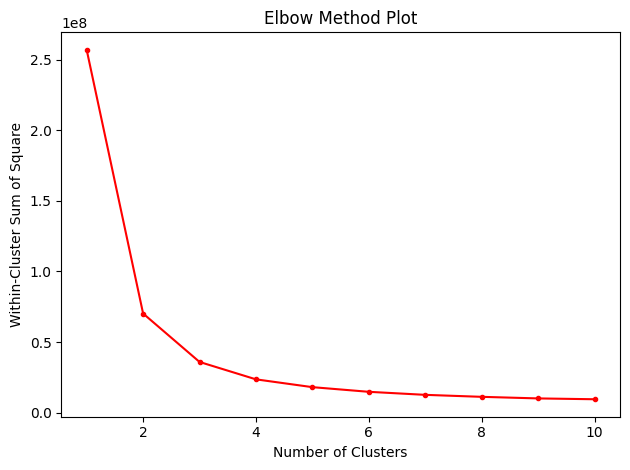

In [9]:
import matplotlib.pyplot as plt

plt.plot(range(1, 11), wcss, marker=".", color='red')
plt.title('Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Square') # Within cluster sum of squares
plt.tight_layout()
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 42)
kmeans.fit(x)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [11]:
y = kmeans.predict(x)
y_df = pd.DataFrame(y,columns=['Class'])

In [12]:
final_data = pd.concat([data,y_df],axis=1) 
final_data.head()

,Unnamed: 0.1,Unnamed: 0,START,STOP,MILES,time,day-night,DAY,CATEGORY_Business,CATEGORY_Personal,...,PURPOSE_Commute,PURPOSE_Customer Visit,PURPOSE_Errand/Supplies,PURPOSE_Meal/Entertain,PURPOSE_Meeting,PURPOSE_Moving,PURPOSE_NOT,PURPOSE_Temporary Site,MONTH,Class
0,0,0,52,48,5.1,21.0,3,0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,1
1,1,1,52,48,5.0,1.0,2,2,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,1
2,2,2,52,48,4.8,20.0,3,2,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,1
3,3,3,52,48,4.7,17.0,1,5,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,1
4,4,4,52,179,63.7,14.0,0,6,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1


In [13]:
from sklearn.decomposition import PCA
pca=PCA()
pca_data=pca.fit_transform(data)

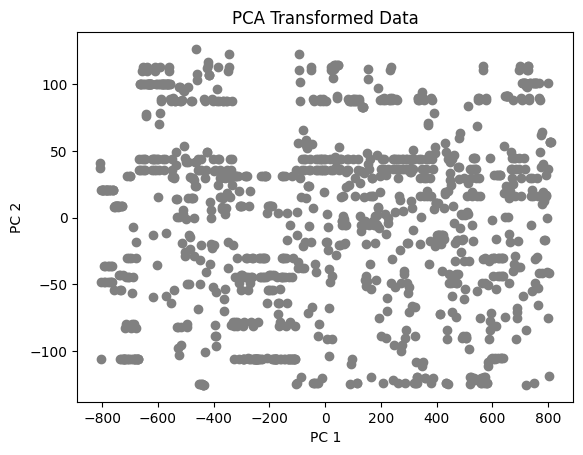

In [14]:
import matplotlib.pyplot as plt
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='grey')
plt.title("PCA Transformed Data")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

In [15]:
df_pca = pca.transform(data)
df_pca.shape

(1135, 22)

In [17]:
df_pca_comp_2 = pd.DataFrame(df_pca, columns=['PC'+str(i) for i in range(22)])
df_pca_comp_2.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
0,809.686512,56.787061,3.032346,-6.648412,-6.446555,-1.080833,-2.664196,0.213947,1.331859,-0.285751,...,-0.033904,-0.158794,-0.031633,-0.005917,0.002628,0.006534,0.001443,0.000879,4.871081e-16,2.476928e-15
1,808.284817,56.721346,2.935761,-6.796396,13.410509,0.911672,-0.125432,0.088837,2.140797,0.647913,...,-0.414382,-0.176967,-0.042582,-0.016004,0.014407,0.001030,0.005063,0.002552,5.911916e-16,1.188029e-15
2,806.857996,56.775327,3.032867,-6.954652,-5.510080,-0.958465,-0.639634,0.155131,1.389906,-0.154231,...,0.107425,-0.451039,-0.078161,-0.015849,0.004317,0.007109,0.000347,0.000331,1.679190e-16,2.338150e-15
3,805.445264,56.754600,3.018544,-7.068873,-2.435280,-0.624979,2.427132,0.137003,-0.308946,-0.456131,...,-0.126871,-0.057680,-0.051229,-0.013316,0.012041,0.001212,0.001196,0.002701,1.193468e-16,2.116106e-15
4,804.135896,-41.215804,-84.485243,51.160953,0.037478,-0.683943,3.441675,-0.052980,-0.935946,-0.211726,...,-0.242070,0.710075,-0.204402,-0.029788,0.002154,-0.003037,-0.009675,-0.011989,-4.427036e-16,-5.377900e-15


In [18]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', max_iter=500, algorithm='lloyd', n_init=10)
kmean_pca = kmeans_pca.fit(df_pca)

In [19]:
df_pca_comp_2["cluster"] = kmeans_pca.labels_

In [20]:
df_pca_comp_analyse = df_pca_comp_2.groupby(df_pca_comp_2["cluster"]).mean()
df_pca_comp_analyse

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
cluster,,,,,,,,,,,,,,,,,,,,,
0,-604.003028,14.099091,-0.945878,-0.562821,0.109462,-0.145820,0.130840,-0.949349,-0.085301,-0.046822,...,0.041703,0.024835,0.009637,-0.001602,-0.002196,0.000349,-0.001113,-0.000142,1.060645e-16,4.383103e-16
1,200.733556,14.289155,0.997977,0.661702,-0.399440,-0.083937,-0.079367,-0.105563,0.136490,-0.050868,...,0.060643,-0.014024,-0.022824,0.018969,0.007164,-0.003999,0.002668,0.000408,8.246042e-17,6.939112e-16
2,-202.271024,-25.809944,0.574055,0.438644,0.073736,0.003256,-0.132953,1.645146,0.033405,0.058196,...,-0.141040,-0.035713,-0.004340,-0.003612,-0.001955,0.001464,-0.000212,-0.000058,-2.894819e-16,-8.435725e-16
3,607.634690,-3.310504,-0.598596,-0.518506,0.215499,0.227821,0.076559,-0.540205,-0.082396,0.041238,...,0.035003,0.023714,0.017240,-0.013760,-0.003014,0.002205,-0.001328,-0.000206,-6.746430e-18,-2.231484e-16


In [21]:
pd.unique(df_pca_comp_2['cluster'])

array([3, 1, 2, 0], dtype=int32)

In [22]:
temp = df_pca_comp_analyse.copy()
temp["cluster"]=[0, 1, 2, 3]

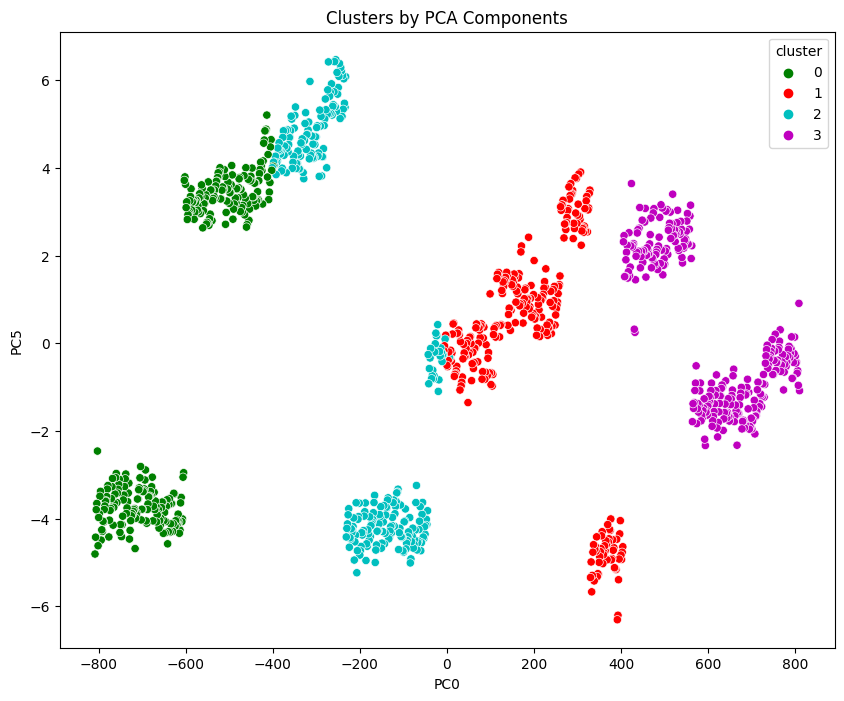

In [24]:
import seaborn as sns

plt.figure(figsize = (10, 8))
sns.scatterplot(df_pca_comp_2, x = "PC0",y = "PC5", hue = "cluster" , palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

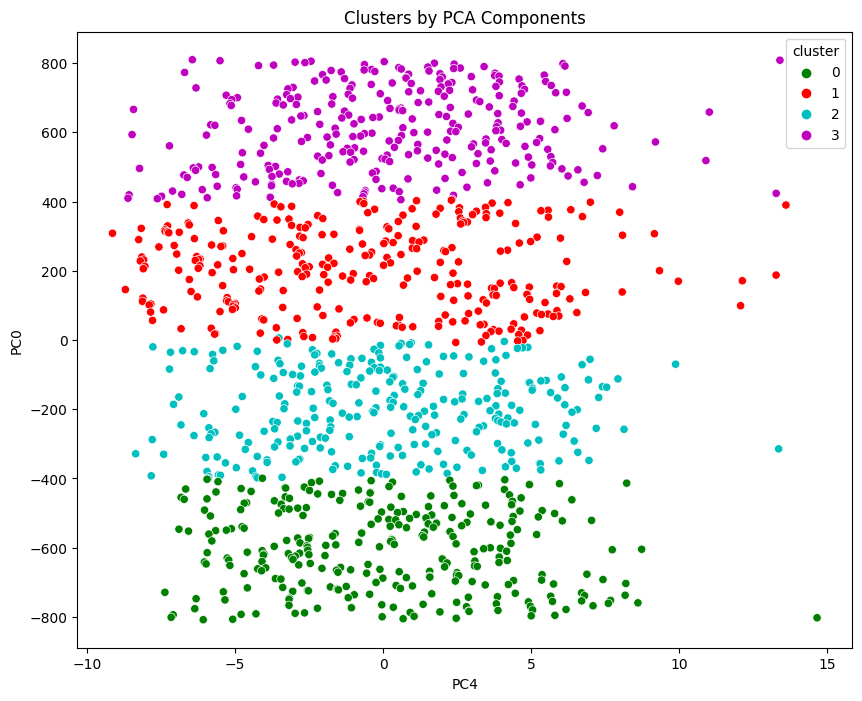

In [25]:
plt.figure(figsize = (10, 8))
sns.scatterplot(df_pca_comp_2, x = "PC4",y = "PC0", hue = "cluster" , palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()